In [56]:
import pandas as pd
import itertools as itt
import ppinetsim
import numpy as np
import matplotlib.pyplot as plt
import json
import itertools as itt
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size':12})
plt.rcParams['pdf.fonttype'] = 42

In [2]:
def to_string(x):
    return ''.join(str(x).split('.'))

def load_results(test_method, acceptance_threshold, false_positive_rate, false_negative_rate):
    infix = f'accTh{to_string(acceptance_threshold)}_FPR{to_string(false_positive_rate)}_FNR{to_string(false_negative_rate)}'
    directory = f'output_results/{test_method}/{infix}'
    posteriors = pd.read_csv(f'{directory}/likelihood_{test_method}_{infix}.csv')
    with open(f'{directory}/all_results_{test_method}_{infix}.json') as fp:
        all_results = json.load(fp)
    return posteriors, all_results

In [24]:
def deltas_sods(test_method, acceptance_threshold, fprs=None, fnrs=None, pivot=True):
    if fprs is None:
        fprs = [0.0,0.003125,0.00625,0.0125,0.025,0.05,0.1,0.2,0.4]
    if fnrs is None:
        fnrs = [0.0,0.1,0.2,0.3,0.4]
    data = {'FPR': [], 'FNR': [], 'delta_sod': []}
    for fpr, fnr in itt.product(fprs, fnrs):
        _, all_results = load_results(test_method, acceptance_threshold, fpr, fnr)
        sod_ba = 0.0
        sod_er = 0.0
        for dist, generator, _ in all_results:
            if generator == 'barabasi-albert':
                sod_ba += dist
            else:
                sod_er += dist
        data['delta_sod'].append((sod_ba - sod_er) / sod_er)
        data['FPR'].append(fpr)
        data['FNR'].append(fnr)
    deltas = pd.DataFrame(data=data)
    if pivot:
        return deltas.pivot('FPR', 'FNR', 'delta_sod')
    return deltas

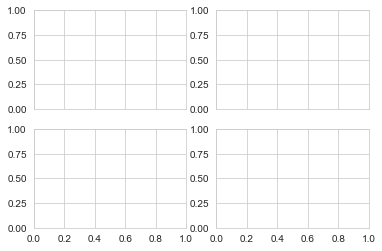

In [18]:
fig, axes = plt.subplot_mosaic(mosaic=[['A','B'],['C','D']],sharex=True)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


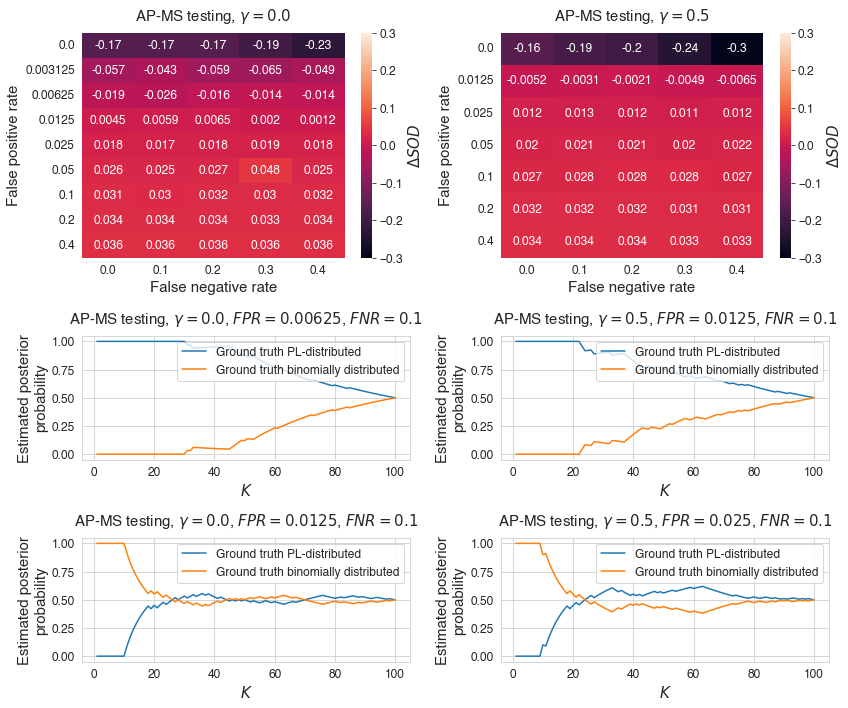

In [76]:
fig, axes = plt.subplot_mosaic(mosaic=[['A','B'],['A','B'],['A','B'],['C','D'],['C','D'],['E','F'],['E','F']],figsize=(12,10))
sns.heatmap(deltas_sods('AP-MS', 0.0),annot=True,ax=axes['A'],vmin=-.3,vmax=.3)
axes['A'].set_title(r'AP-MS testing, $\gamma={}$'.format(0.0),pad=12,fontsize=12)
sns.heatmap(deltas_sods('AP-MS', 0.5, fprs=[0.0,0.0125,0.025,0.05,0.1,0.2,0.4]),annot=True,ax=axes['B'],vmin=-.3,vmax=.3)
for label, gamma in [('A',0.0), ('B', 0.5)]:
    axes[label].set_title(r'AP-MS testing, $\gamma={}$'.format(gamma),pad=12,fontsize=15)
    axes[label].set_xlabel('False negative rate', fontsize=15)
    axes[label].set_ylabel('False positive rate', fontsize=15)
    colorbar = axes[label].collections[0].colorbar
    colorbar.set_label(r'$\Delta\mathit{SOD}$',fontsize=15)
for label, gamma, fpr in [('C', 0.0, 0.00625), ('D', 0.5, 0.0125), ('E', 0.0, 0.0125), ('F', 0.5, 0.025)]:
    posteriors, _ = load_results('AP-MS', acceptance_threshold=gamma,
                                 false_positive_rate=fpr, false_negative_rate=0.1)
    ppinetsim.plot_posteriors(posteriors, ax=axes[label], parameters={'acceptance_threshold': gamma,
                                                      'false_positive_rate': fpr,
                                                      'false_negative_rate': 0.1, 'test_method': 'AP-MS'})
    axes[label].set_title(r'AP-MS testing, $\gamma={}$, $FPR={}$, $FNR=0.1$'.format(gamma, fpr),pad=12,fontsize=15)
    axes[label].set_ylabel('Estimated posterior\nprobability',fontsize=15)
    axes[label].set_xlabel(r'$K$', fontsize=15)
    handles, labels = axes[label].get_legend_handles_labels()
    axes[label].legend(handles=handles[0:], labels=labels[0:],loc='upper right')
fig.tight_layout()
fig.savefig('simulation_AP-MS.pdf')

[Text(0.5, 1.0, 'Y2H testing, $\\gamma=0.0$')]

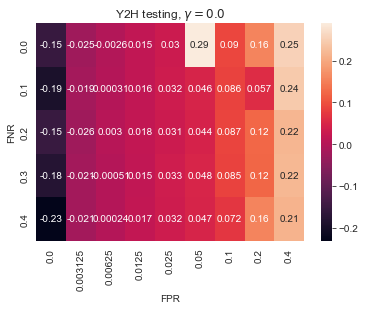

In [5]:
deltas_Y2H = deltas_sods('Y2H', 0.0)
sns.heatmap(deltas_Y2H.pivot('FNR', 'FPR', 'delta_sod'),annot=True).set(title=r'Y2H testing, $\gamma={}$'.format(0.0))

[Text(0.5, 1.0, 'Y2H testing, $\\gamma=0.5$')]

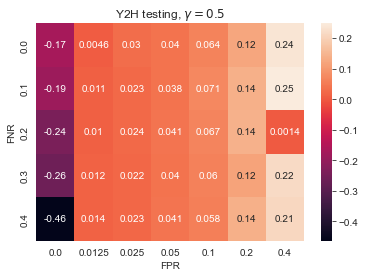

In [21]:
deltas_Y2H = deltas_sods('Y2H', 0.5)
sns.heatmap(deltas_Y2H.pivot('FNR', 'FPR', 'delta_sod'),annot=True).set(title=r'Y2H testing, $\gamma={}$'.format(0.5))

[Text(0.5, 1.0, 'AP-MS testing, $\\gamma=0.0$')]

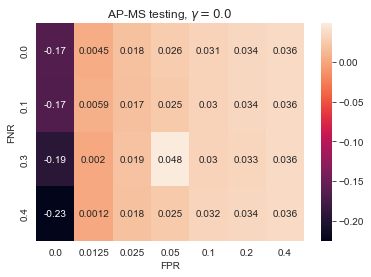

In [25]:
deltas_AP_MS = deltas_sods('AP-MS', 0.0)
sns.heatmap(deltas_AP_MS.pivot('FNR', 'FPR', 'delta_sod'),annot=True).set(title=r'AP-MS testing, $\gamma={}$'.format(0.0))

[Text(0.5, 1.0, 'AP-MS testing, $\\gamma=0.5$')]

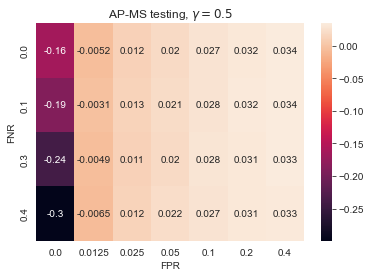

In [24]:
deltas_AP_MS = deltas_sods('AP-MS', 0.5)
sns.heatmap(deltas_AP_MS.pivot('FNR', 'FPR', 'delta_sod'),annot=True).set(title=r'AP-MS testing, $\gamma={}$'.format(0.5))

[Text(0.5, 1.0, 'AP-MS testing, $\\mathit{FPR}=0.00625$, $\\mathit{FNR}=0.1$, $\\gamma=0.0$')]

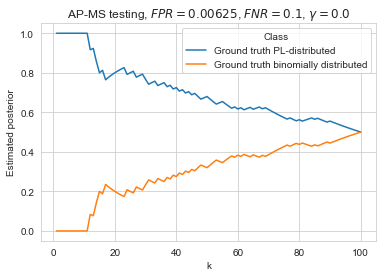

In [14]:
posteriors, all_results = load_results('Y2H', acceptance_threshold=0.0, false_positive_rate=0.003125, false_negative_rate=0.2)
ppinetsim.plot_posteriors(posteriors, parameters={'acceptance_threshold': 0.0, 'false_positive_rate': 0.00625, 'false_negative_rate': 0.1, 'test_method': 'AP-MS'})

[Text(0.5, 1.0, 'AP-MS testing, $\\mathit{FPR}=0.0125$, $\\mathit{FNR}=0.1$, $\\gamma=0.0$')]

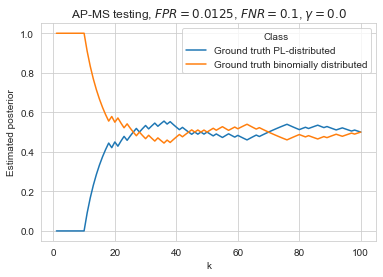

In [7]:
posteriors, all_results = load_results('AP-MS', acceptance_threshold=0.0, false_positive_rate=0.0125, false_negative_rate=0.1)
ppinetsim.plot_posteriors(posteriors, parameters={'acceptance_threshold': 0.0, 'false_positive_rate': 0.0125, 'false_negative_rate': 0.1, 'test_method': 'AP-MS'})

/Users/dbblumenthal/opt/anaconda3/envs/corrnet/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dbblumenthal/opt/anaconda3/envs/corrnet/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, '')]

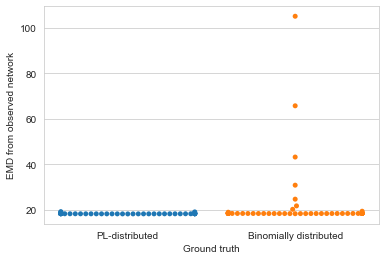

In [18]:
ppinetsim.plot_distances(all_results,kind='swarm')![](../../../../../var/folders/71/cy2w33mn5wng7mg2_mdj3x2h0000gn/T/TemporaryItems/NSIRD_screencaptureui_VsBReD/Screenshot 2023-02-17 at 13.02.21.png)

[Text(0.5, 1.0, 'AP-MS testing, $\\mathit{FPR}=0.0125$, $\\mathit{FNR}=0.1$, $\\gamma=0.0$')]

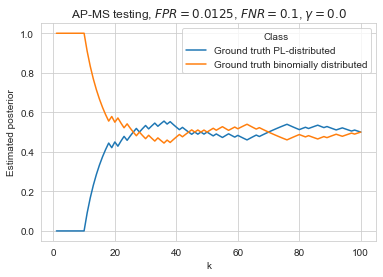

In [11]:
posteriors, all_results = load_results('AP-MS', acceptance_threshold=0.0, false_positive_rate=0.0125, false_negative_rate=0.1)
ppinetsim.plot_posteriors(posteriors, parameters={'acceptance_threshold': 0.0, 'false_positive_rate': 0.0125, 'false_negative_rate': 0.1, 'test_method': 'AP-MS'})

/Users/dbblumenthal/opt/anaconda3/envs/corrnet/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dbblumenthal/opt/anaconda3/envs/corrnet/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, '')]

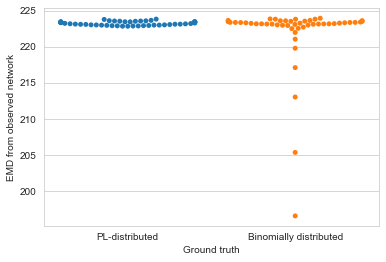

In [12]:
ppinetsim.plot_distances(all_results,kind='swarm')

[Text(0.5, 1.0, 'AP-MS testing, $\\mathit{FPR}=0.1$, $\\mathit{FNR}=0.1$, $\\gamma=0.0$')]

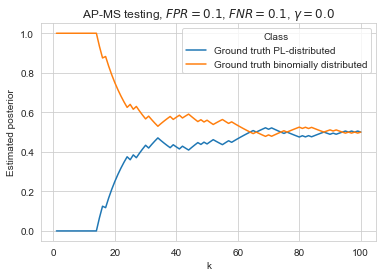

In [15]:
posteriors, all_results = load_results('AP-MS', acceptance_threshold=0.0, false_positive_rate=0.2, false_negative_rate=0.1)
ppinetsim.plot_posteriors(posteriors, parameters={'acceptance_threshold': 0.0, 'false_positive_rate': 0.1, 'false_negative_rate': 0.1, 'test_method': 'AP-MS'})

/Users/dbblumenthal/opt/anaconda3/envs/corrnet/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dbblumenthal/opt/anaconda3/envs/corrnet/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, '')]

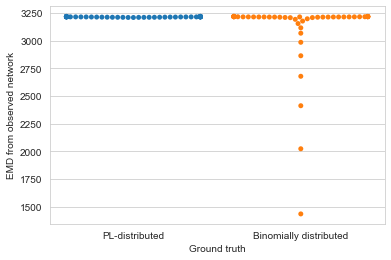

In [16]:
ppinetsim.plot_distances(all_results,kind='swarm')

[Text(0.5, 1.0, 'FPR=0.0, FNR=0.1, $\\gamma$=0.0')]

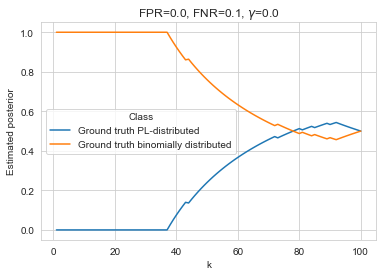

In [30]:
posteriors, _ = load_results('Y2H', acceptance_threshold=0.0, false_positive_rate=0.0, false_negative_rate=0.1)
posteriors.rename(columns={'Erdos-Renyi': 'Ground truth binomially distributed', 'Barabasi-Albert': 'Ground truth PL-distributed'}, inplace=True)
ppinetsim.plot_posteriors(posteriors, acceptance_threshold=0.0, false_positive_rate=0.0, false_negative_rate=0.1)